In [1]:
import pandas as pd 
insurance = pd.read_csv('insurance.csv')#从CSV文件导入数据
print(insurance.head(20))#打印出数据的前20行，对数据进行观察

    age     sex     bmi  children smoker     region      charges
0    19  female  27.900         0    yes  southwest  16884.92400
1    18    male  33.770         1     no  southeast   1725.55230
2    28    male  33.000         3     no  southeast   4449.46200
3    33    male  22.705         0     no  northwest  21984.47061
4    32    male  28.880         0     no  northwest   3866.85520
5    31  female  25.740         0     no  southeast   3756.62160
6    46  female  33.440         1     no  southeast   8240.58960
7    37  female  27.740         3     no  northwest   7281.50560
8    37    male  29.830         2     no  northeast   6406.41070
9    60  female  25.840         0     no  northwest  28923.13692
10   25    male  26.220         0     no  northeast   2721.32080
11   62  female  26.290         0    yes  southeast  27808.72510
12   23    male  34.400         0     no  southwest   1826.84300
13   56  female  39.820         0     no  southeast  11090.71780
14   27    male  42.130  

In [3]:
#显示数据的属性和类型，以便之后的操作
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [55]:
#先将非数值数据转化为数值数据，以便之后的统计
df = insurance.copy()
from sklearn.preprocessing import LabelEncoder
#将性别的 非数值数据转化为数值型数据：Female为0，Male为1
sex_le = LabelEncoder()
df['sex'] = sex_le.fit_transform(df['sex'].values)
#将smoker非数值型数据转化为数值型数据：no为0,yes为1
smoker_le = LabelEncoder()
df['smoker'] = smoker_le.fit_transform(df['smoker'].values)
#将region非数值型数据转化为数值型数据：southwest为3,southeast为2,northwest为1，northeast为0
region_le = LabelEncoder()
df['region'] = region_le.fit_transform(df['region'].values)
print(df.head(10))

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520
5   31    0  25.740         0       0       2   3756.62160
6   46    0  33.440         1       0       2   8240.58960
7   37    0  27.740         3       0       1   7281.50560
8   37    1  29.830         2       0       0   6406.41070
9   60    0  25.840         0       0       1  28923.13692


In [56]:
#统计非空的数目
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [16]:
#观察数据的基本统计特征
print('数据的平均值：')
print(df.mean())
print('数据的最大值：')
print(df.max())
print('数据的最小值：')
print(df.min())

数据的平均值：
age            39.207025
sex             0.505232
bmi            30.663397
children        1.094918
smoker          0.204783
region          1.515695
charges     13270.422265
dtype: float64
数据的最大值：
age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
region          3.00000
charges     63770.42801
dtype: float64
数据的最小值：
age           18.0000
sex            0.0000
bmi           15.9600
children       0.0000
smoker         0.0000
region         0.0000
charges     1121.8739
dtype: float64


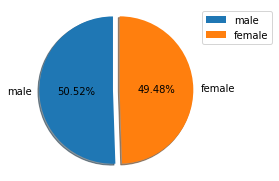

In [51]:
#画图以更加直观的观察数据的各项分布特征
#sex
male =sum(df['sex'])#male的总数
female = 0
for i in df['sex']:
    if (i == 0):
        female = female + 1#female的总数
plt.figure(figsize=(3,5))
labels=[u'male',u'female']
data0 = [male,female]
explode=(0,0.15,0)
pie,text1,text2=plt.pie(data0,
                        explode=(0,0.10),
                        labels=labels,
                        autopct='%3.2f%%',
                        shadow=True,
                        startangle=90,
                        radius=1.1,
                        pctdistance=0.5,
                        textprops={'fontsize':10,'color':'black'})#饼图
plt.legend(labels=labels,
           loc='best',
           bbox_to_anchor=(1,1),
           fontsize=10)

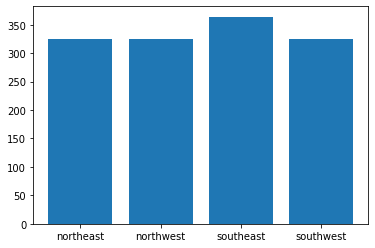

In [53]:
#region
def count(n):
    m = 0
    for i in df['region']:
        if (i == n):
            m = m + 1
    return m
data1 = [count(0),count(1),count(2),count(3)]
labels = ['northeast', 'northwest', 'southeast', 'southwest']
plt.bar(range(len(data1)),data1,tick_label=labels)
plt.show()

# 构建线性回归模型 

## 划分数据集为训练集和测试集

In [57]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [128]:
x = df.drop(['charges','region','children'],axis = 1)
y = df['charges']

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(x, y, test_size=0.2, random_state=125)
print(len(X_train),len(X_test))

1070 268


In [136]:
#构建模型
from sklearn.linear_model import LinearRegression
from sklearn import metrics
LR = LinearRegression()

LR.fit(X_train,Y_train)#测试模型
#查看模型
pd.Series(data = LR.coef_,index = x.columns)#coef_为相关系数（w1,w2……,wn）

age         266.392290
sex        -240.113243
bmi         310.972779
smoker    23692.496062
dtype: float64

In [137]:
pred_y_test = LR.predict(X_test)#训练集模型预测

pred_y_train = LR.predict(X_train)#测试集模型预测

print("训练集R^2: ", metrics.explained_variance_score(Y_test,pred_y_test))
print("测试集R^2: " ,metrics.explained_variance_score(Y_train,pred_y_train))

训练集R^2:  0.765946564118609
测试集R^2:  0.7429747472864221
